In [263]:
#REQUIRED LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [264]:
#LOADING THE DATASET
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [265]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [266]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [267]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [268]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [269]:
print(train_df.shape)
print(test_df.shape)

(27455, 785)
(7172, 785)


In [270]:
#CREATING X_Train , Y_train , X_test , Y_test
trainset=train_df.drop(['label'],axis=1) #X-TRAIN
train_label=train_df['label']  #Y-TRAIN
train_label.head()


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [271]:
train_label.shape

(27455,)

In [272]:
X_test=test_df.drop(['label'],axis=1)
test_label=test_df['label'] #Y-TEST
test_label.head()

0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64

In [273]:
del train_df['label']
del test_df['label']

In [274]:
#DATA NORMALIZATION : MAKES EASIER FOR CNN
trainset= trainset/255.0
X_test= X_test/255.0

In [275]:
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [276]:
X_test = X_test.values.reshape(-1,28,28,1)
print(X_test.shape)

(7172, 28, 28, 1)


In [277]:
#CONVERTING THE INTEGER LABELS TO BINARY FORM
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
Y_train=lb.fit_transform(train_label)
Y_test = lb.fit_transform(test_label)

In [278]:
#SPLITTING X_TRAIN AND Y_TRAIN
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [279]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(21964, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


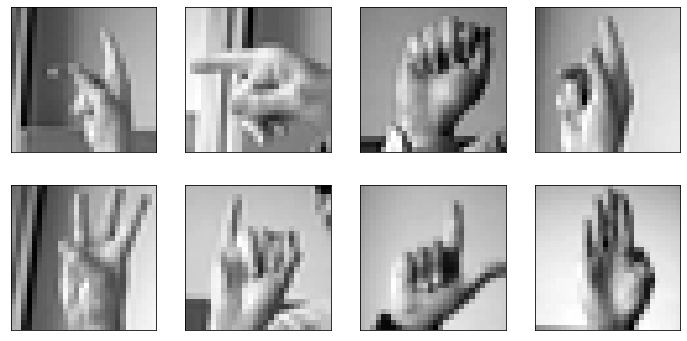

In [280]:
#DATA VISUALIZATION
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap='gray')
    
plt.show()

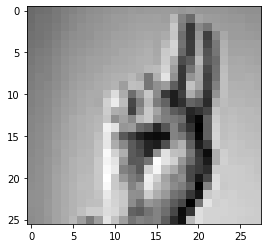

In [281]:
plt.imshow(X_train[10][2:,:,0],cmap='gray')
plt.show()

C:\Users\RIYA BONGIRWAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of each label')

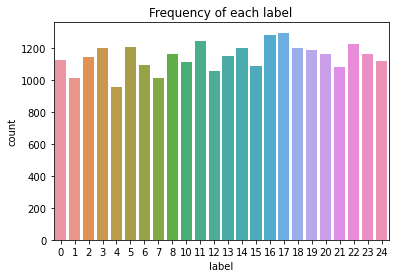

In [282]:
sns.countplot(train_label)
plt.title("Frequency of each label")

In [283]:
#BUILDING CNN MODEL
import itertools
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 7, 7, 512)         590336    
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 3, 3, 512)      

In [284]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [285]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [290]:
epochs=35
batch_size = 200

In [291]:
#TRAINING THE MODEL 
history = model.fit(datagen.flow(X_train,Y_train,batch_size=batch_size),
         epochs = epochs,
          validation_data=(X_val,Y_val),
          steps_per_epoch=X_train.shape[0]//batch_size
         )

Epoch 1/35
109/109 [==============================] - 312s 3s/step - loss: 1.1988 - accuracy: 0.5968 - val_loss: 0.5960 - val_accuracy: 0.7862
Epoch 2/35
109/109 [==============================] - 292s 3s/step - loss: 0.8740 - accuracy: 0.7015 - val_loss: 0.3294 - val_accuracy: 0.8813
Epoch 3/35
109/109 [==============================] - 241s 2s/step - loss: 0.7116 - accuracy: 0.7580 - val_loss: 0.2459 - val_accuracy: 0.9170
Epoch 4/35
109/109 [==============================] - 299s 3s/step - loss: 0.5560 - accuracy: 0.8150 - val_loss: 0.1620 - val_accuracy: 0.9494
Epoch 5/35
109/109 [==============================] - 303s 3s/step - loss: 0.4758 - accuracy: 0.8372 - val_loss: 0.1637 - val_accuracy: 0.9439
Epoch 6/35
109/109 [==============================] - 235s 2s/step - loss: 0.3858 - accuracy: 0.8700 - val_loss: 0.0650 - val_accuracy: 0.9791
Epoch 7/35
109/109 [==============================] - 232s 2s/step - loss: 0.3397 - accuracy: 0.8881 - val_loss: 0.1050 - val_accuracy: 0.9698

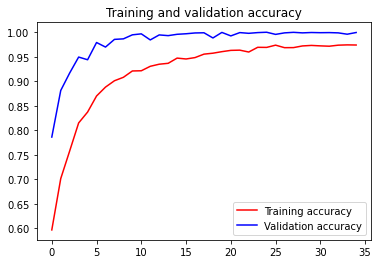

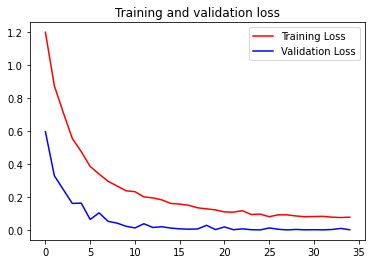

In [292]:
#VISUALIZATION OF RESULT
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()